In [8]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.rcParams["figure.figsize"] = [16,9]
sns.set_style('whitegrid')

PLOT_MASK = range(1475,1550)

In [2]:
original_masked = pd.read_csv("/home/pravn/Documents/original_masked.csv")
predicted_masked = pd.read_csv("/home/pravn/Documents/predicted_masked.csv")

In [4]:
original_masked.head()

,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,...,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549
0,1.002929,1.020100,1.024491,1.022349,1.012781,0.992014,0.972579,0.980616,1.017553,1.024633,...,0.981723,1.000010,1.010591,0.986887,0.998070,1.034840,1.039356,1.017275,1.003299,0.992692
1,0.913974,0.925080,0.914015,0.910713,0.909456,0.895285,0.886678,0.900813,0.901776,0.873538,...,0.920796,0.959569,0.955362,0.919839,0.916352,0.927437,0.954766,0.975278,0.964925,0.940629
2,0.852568,0.855619,0.852560,0.847285,0.843284,0.833912,0.815157,0.815373,0.822885,0.808645,...,0.850151,0.841934,0.837705,0.847344,0.861569,0.875073,0.886794,0.884729,0.878885,0.859658
3,0.799966,0.805414,0.790533,0.784372,0.764509,0.766564,0.785371,0.782442,0.776574,0.776972,...,0.826576,0.834315,0.820822,0.824237,0.821758,0.825028,0.833799,0.852333,0.860145,0.859907
4,0.762165,0.753905,0.756847,0.772023,0.768651,0.756399,0.747767,0.750086,0.752324,0.737946,...,0.807266,0.821148,0.830479,0.826671,0.820743,0.815063,0.803316,0.793477,0.788137,0.810344


In [5]:
predicted_masked.head()

,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,...,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549
0,1.018830,1.016511,1.015821,1.013727,1.013210,1.013132,1.013158,1.008924,1.002333,0.997211,...,0.987615,0.984581,0.983644,0.987998,0.994014,1.000573,1.003454,1.005957,1.002679,0.991011
1,0.923370,0.922416,0.920717,0.918299,0.916335,0.912604,0.908773,0.903883,0.898973,0.894918,...,0.929634,0.931609,0.934436,0.936264,0.938794,0.941610,0.942814,0.944700,0.945979,0.945980
2,0.833624,0.835287,0.834427,0.833440,0.830259,0.827519,0.822649,0.817499,0.812863,0.808088,...,0.847622,0.852308,0.854076,0.859130,0.860903,0.864676,0.867659,0.868259,0.868238,0.869628
3,0.805425,0.804950,0.803004,0.800713,0.796695,0.793211,0.787587,0.782084,0.776648,0.771100,...,0.816064,0.820641,0.823647,0.828394,0.830775,0.835485,0.839159,0.841010,0.842377,0.844980
4,0.753954,0.749954,0.746684,0.742060,0.736810,0.731616,0.725868,0.720074,0.713140,0.706271,...,0.758719,0.763150,0.767361,0.771797,0.775519,0.779624,0.783356,0.787130,0.790463,0.793147


In [6]:
difference = original_masked - predicted_masked

In [39]:
PLOT_INDEX=476622

In [9]:
hf_grid = h5py.File("/home/pravn/Dropbox/Masters/Research Data/wl_grid.h5", "r")
wl_grid = np.array(hf_grid["wl_grid"])
wl_grid = wl_grid[PLOT_MASK]

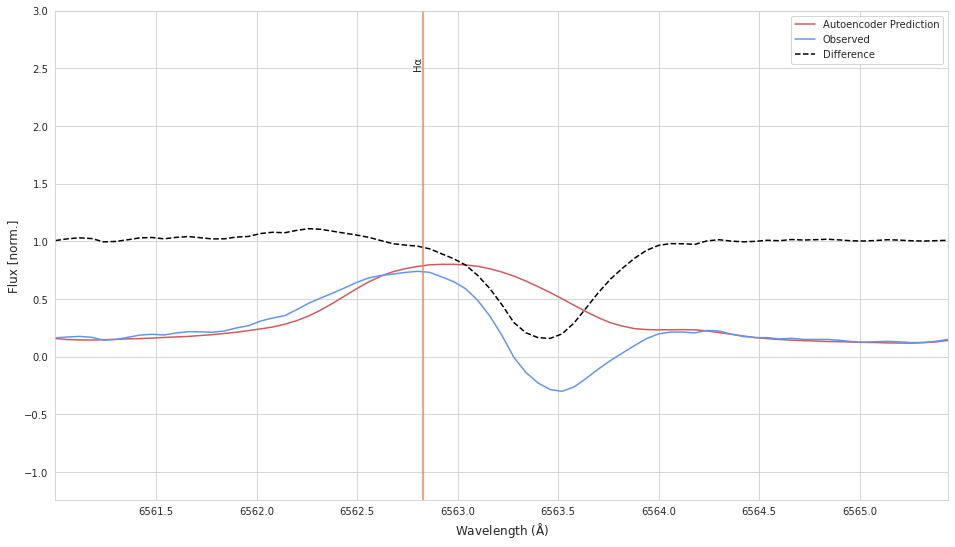

In [40]:
f, ax = plt.subplots(figsize=(16,9))
ax.plot(wl_grid, 1- predicted_masked.loc[PLOT_INDEX,:], color="indianred", lw=1.5, label="Autoencoder Prediction")
ax.plot(wl_grid, 1- original_masked.loc[PLOT_INDEX,:], color="cornflowerblue", lw=1.5,label="Observed")
ax.plot(wl_grid, 1- difference.loc[PLOT_INDEX,:], color="black", linestyle='--',lw=1.5,label="Difference")
plt.axvline(x=6562.83, color='coral')
ax.text(6562.78,2.5,"Hα", rotation=90)
ax.set_xlabel("Wavelength ($\mathrm{\AA}$)", size=12)
ax.set_ylabel("Flux [norm.]", size=12)
ax.set_ylim((original_masked.loc[PLOT_INDEX,:].min()- 1.50),3)
ax.set_xlim(wl_grid.min(), wl_grid.max() )
ax.legend()
plt.show()

In [42]:
PLOT_INDEX = 0

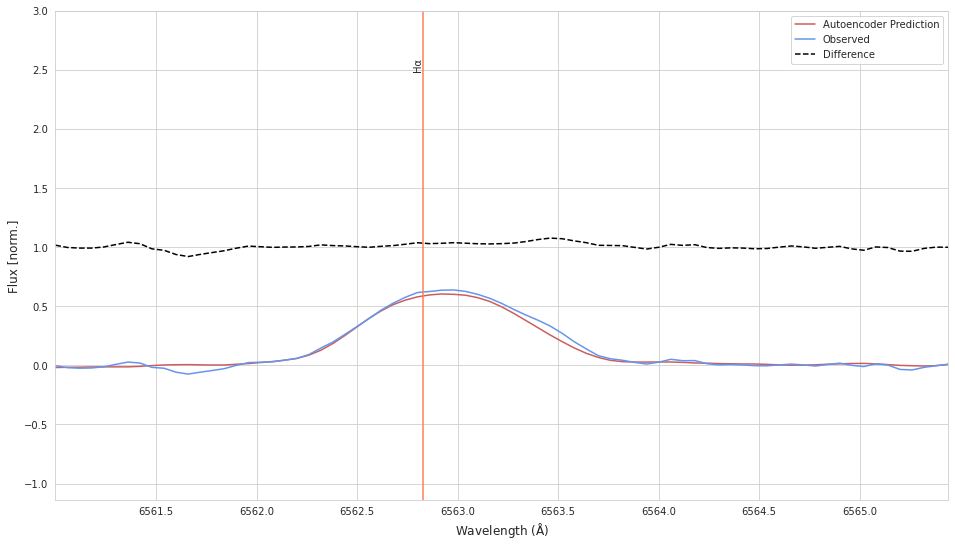

In [43]:
f, ax = plt.subplots(figsize=(16,9))
ax.plot(wl_grid, 1- predicted_masked.loc[PLOT_INDEX,:], color="indianred", lw=1.5, label="Autoencoder Prediction")
ax.plot(wl_grid, 1- original_masked.loc[PLOT_INDEX,:], color="cornflowerblue", lw=1.5,label="Observed")
ax.plot(wl_grid, 1- difference.loc[PLOT_INDEX,:], color="black", linestyle='--',lw=1.5,label="Difference")
plt.axvline(x=6562.83, color='coral')
ax.text(6562.78,2.5,"Hα", rotation=90)
ax.set_xlabel("Wavelength ($\mathrm{\AA}$)", size=12)
ax.set_ylabel("Flux [norm.]", size=12)
ax.set_ylim((original_masked.loc[PLOT_INDEX,:].min()- 1.50),3)
ax.set_xlim(wl_grid.min(), wl_grid.max() )
ax.legend()
plt.show()

In [15]:
from specutils import Spectrum1D
from specutils import SpectralRegion
from specutils.analysis import equivalent_width
from specutils.analysis import fwhm
from astropy import units as u

In [52]:
PLOT_INDEX = 0

In [53]:
test = Spectrum1D(spectral_axis=wl_grid*u.AA,flux=(1-difference.loc[PLOT_INDEX,:]).to_numpy()*u.Jy)

In [54]:
print(equivalent_width(test,continuum=1))

-0.022394133593952873 Angstrom
